In [2]:
!pip install easygui

In [3]:
import pandas as pd
import easygui as eg 
import numpy as np 
import matplotlib.pyplot as plt

# This is designed specifically to allow the end user to open a file dialog to select the CSV File
path = eg.fileopenbox()

# Data will be our base dataframe
data = pd.read_csv(path)

# Season Length. Necessary for truncated seasons.
season = 56

ValueError: Invalid file path or buffer object type: <class 'NoneType'>

In [46]:
# CCFHL Scoring category dictionaries that assign the value for each scored statistic

def evaluate(std):
    global centers
    global defense
    global wingers
    global enforcers
    global utility
    global pk
    global adjustment
    global centernp
    global defensenp
    global wingersnp
    global enrofcersnp
    global pknp
    global utilnp
    global colstart
    global colend
    global projections
    global eval
    
    if std == 'CCFHL':
        centers = {'G':2, 'A':1.5, 'PIM':.075, '+/-':0, 'FT':0, 'SHP':0, 'STP':0, 'OG':.5, 'HIT':.075, 'BLK':.17, 'TK':0, 'FOW':.01}
        defense = {'G':2, 'A':1.5, 'PIM':.075, '+/-':0, 'FT':0, 'SHP':0, 'STP':0, 'OG':.5, 'HIT':.075, 'BLK':.17, 'TK':0, 'FOW':0}
        wingers = {'G':2, 'A':1.5, 'PIM':.075, '+/-':0, 'FT':0, 'SHP':0, 'STP':.4, 'OG':.5, 'HIT':.075, 'BLK':.17, 'TK':.3, 'FOW':0}
        enforcers = {'G':.6, 'A':0.5, 'PIM':.1, '+/-':0, 'FT':1, 'SHP':0, 'STP':0, 'OG':.1, 'HIT':.2, 'BLK':.1, 'TK':0, 'FOW':0}
        pk = {'G':.6, 'A':0.5, 'PIM':.075, '+/-':.3, 'FT':0, 'SHP':.04, 'STP':.4, 'OG':.1, 'HIT':.1, 'BLK':.32, 'TK':.3, 'FOW':.01}
                   
        # Numpy Array created from the values of the dictionaries. 
        # These arrays will be used to calculate the weighted score for each player.
        
        centernp = np.fromiter(centers.values(), dtype = float)
        defensenp = np.fromiter(defense.values(), dtype = float)
        wingersnp = np.fromiter(wingers.values(), dtype = float)
        enforcersnp = np.fromiter(enforcers.values(), dtype = float)
        pknp = np.fromiter(pk.values(), dtype = float)
        
        # We need to generate a baseline data array of all players in the dataset, generated for all league statistics

        colstart = data.columns.get_loc('G')
        colend = data.columns.get_loc('FOW')+1
        projections = data.iloc[:, colstart:colend]
        
        data['NHL Team'] = data['Team']
        data['Team'] = data['Status']
        
        # We calculate the sumproduct of the scoring metrics and the full dataset by utilizing the dot product 
        # of the transposed scoring metrics. Matrix Multiplication yields the resulting scoring value projection
        # Given the season is 56 games this season, the projections are adjusted to reflect the length of the season.

        data['Center'] = round((projections.dot(centernp.T)/82)*season,1)
        data['Winger'] = round((projections.dot(wingersnp.T)/82)*season,1)
        data['Defense'] = round((projections.dot(defensenp.T)/82)*season,1)
        data['Enforcer'] = round((projections.dot(enforcersnp.T)/82)*season,1)
        data['PK'] = round((projections.dot(pknp.T)/82)*season,1)
        
        # We need to adjust the scoring in each generated positional category to reflect 0 if the player is not
        # eligible for that position. For example, a Centerman who is not eligble to play Defense, will have a 
        # score of 0 for Defense.

        data.loc[data['Position'].isin(['C','C/W']) == False, 'Center'] = 0
        data.loc[data['Position'].isin(['W','C/W', 'W/D']) == False, 'Winger'] = 0
        data.loc[data['Position'].isin(['D', 'W/D']) == False, 'Defense'] = 0
        data.loc[data['Position'].isin(['W', 'D', 'C', 'C/W', 'W/D']) == False, 'Enforcer'] = 0
        data.loc[data['Position'].isin(['W', 'D', 'C', 'C/W', 'W/D']) == False, 'PK'] = 0
        
        # Two columns that are important to reflect our calculations. Max represents the top score
        # that a player is eligible for, and Reccomendation represents the position the player
        # should be categorized as.

        data['Max'] = data[['Center','Winger','Defense','Enforcer','PK']].max(axis=1)
        data['Reccomendation'] = data[['Center','Winger','Defense','Enforcer','PK']].idxmax(axis = 1)
        
        eval = data[['Player','Team', 'NHL Team','Position','Age','Salary', 'Center','Winger','Defense','PK','Enforcer', 'Max','Reccomendation']]
        eval = eval.loc[eval['Max'] >=10].sort_values(by = ['Max'], ascending = False).reset_index(drop=True)
        eval['Rank'] = eval.index+1

        return pd.DataFrame.from_dict([centers, wingers, defense, enforcers, pk]).rename(index={0: "Center", 1: "Winger", 2: "Defense", 3: "Utility", 4:"Enforcer", 5:"Utility"})
    
    elif std == 'DOFHL':
        
        centers = {'G':2, 'A':1.5, 'PIM':.075, '+/-':0, 'FT':0, 'SHP':0, 'STP':0, 'OG':.5, 'HIT':.075, 'BLK':.17, 'TK':0, 'FOW':.03}
        defense = {'G':2, 'A':1.5, 'PIM':.075, '+/-':0, 'FT':0, 'SHP':.4, 'STP':.4, 'OG':.5, 'HIT':.075, 'BLK':.34, 'TK':.3, 'FOW':0}
        wingers = {'G':2, 'A':1.5, 'PIM':.075, '+/-':0, 'FT':0, 'SHP':0, 'STP':0, 'OG':.5, 'HIT':.075, 'BLK':.17, 'TK':0, 'FOW':0}
        utility = {'G':.6, 'A':0.5, 'PIM':.1, '+/-':.3, 'FT':1, 'SHP':.04, 'STP':0, 'OG':.1, 'HIT':.15, 'BLK':.4, 'TK':.3, 'FOW':.03}
                
        # Numpy Array created from the values of the dictionaries. 
        # These arrays will be used to calculate the weighted score for each player.
        
        centernp = np.fromiter(centers.values(), dtype = float)
        defensenp = np.fromiter(defense.values(), dtype = float)
        wingersnp = np.fromiter(wingers.values(), dtype = float)
        utilnp = np.fromiter(utility.values(), dtype = float)
        
        # We need to generate a baseline data array of all players in the dataset, generated for all league statistics

        colstart = data.columns.get_loc('G')
        colend = data.columns.get_loc('FOW')+1
        projections = data.iloc[:, colstart:colend]
        
        data['NHL Team'] = data['Team']
        data['Team'] = data['Status']
        
        # We calculate the sumproduct of the scoring metrics and the full dataset by utilizing the dot product 
        # of the transposed scoring metrics. Matrix Multiplication yields the resulting scoring value projection
        # Given the season is 56 games this season, the projections are adjusted to reflect the length of the season.

        data['Center'] = round((projections.dot(centernp.T)/82)*season,1)
        data['Winger'] = round((projections.dot(wingersnp.T)/82)*season,1)
        data['Defense'] = round((projections.dot(defensenp.T)/82)*season,1)
        data['Utility'] = round((projections.dot(utilnp.T)/82)*season,1)
        
        # We need to adjust the scoring in each generated positional category to reflect 0 if the player is not
        # eligible for that position. For example, a Centerman who is not eligble to play Defense, will have a 
        # score of 0 for Defense.

        data.loc[data['Position'].isin(['C','C/W']) == False, 'Center'] = 0
        data.loc[data['Position'].isin(['W','C/W', 'W/D']) == False, 'Winger'] = 0
        data.loc[data['Position'].isin(['D', 'W/D']) == False, 'Defense'] = 0
        data.loc[data['Position'].isin(['W', 'D', 'C', 'C/W', 'W/D']) == False, 'Utility'] = 0
        
        # Two columns that are important to reflect our calculations. Max represents the top score
        # that a player is eligible for, and Reccomendation represents the position the player
        # should be categorized as.

        data['Max'] = data[['Center','Winger','Defense','Utility']].max(axis=1)
        data['Reccomendation'] = data[['Center','Winger','Defense','Utility']].idxmax(axis = 1)
        
        eval = data[['Player','Team', 'NHL Team','Position','Age','Salary', 'Center','Winger','Defense','Utility', 'Max','Reccomendation']]
        eval = eval.loc[eval['Max'] >=10].sort_values(by = ['Max'], ascending = False).reset_index(drop=True)
        eval['Rank'] = eval.index+1

        return pd.DataFrame.from_dict([centers, wingers, defense, utility]).rename(index={0: "Center", 1: "Winger", 2: "Defense", 3: "Utility"})
    
    else:
        centers = {}
        defense = {}
        wingers = {}
        enforcers = {}
        pk = {}
        adjustment = []
    

In [47]:
data['Position'].unique()

array(['C,W', 'W', 'C', 'D'], dtype=object)

In [48]:
def normalize(league):
    if league == 'CCFHL':
        adjustment = ['C/W','W','C','D']
    elif league == 'DOFHL':
        adjustment = ['C/W','C','D','W', 'W', 'C/W', 'C/W', 'W','W/D','W/D','W/D']
    else:
        adjustment = []
    data['Position'] = data['Position'].replace(data['Position'].unique(),adjustment)
    std = league
    return evaluate(std)

In [49]:
normalize('CCFHL')

,G,A,PIM,+/-,FT,SHP,STP,OG,HIT,BLK,TK,FOW
Center,2.0,1.5,0.075,0.0,0,0.00,0.0,0.5,0.075,0.17,0.0,0.01
Winger,2.0,1.5,0.075,0.0,0,0.00,0.4,0.5,0.075,0.17,0.3,0.00
Defense,2.0,1.5,0.075,0.0,0,0.00,0.0,0.5,0.075,0.17,0.0,0.00
Utility,0.6,0.5,0.100,0.0,1,0.00,0.0,0.1,0.200,0.10,0.0,0.00
Enforcer,0.6,0.5,0.075,0.3,0,0.04,0.4,0.1,0.100,0.32,0.3,0.01


In [50]:
eval.loc[eval['Team'] == 'MIN']

,Player,Team,NHL Team,Position,Age,Salary,Center,Winger,Defense,PK,Enforcer,Max,Reccomendation,Rank
32,Roman Josi,MIN,NSH,D,30,"9,059,000",0.0,0.0,88.4,73.2,40.0,88.4,Defense,33
40,Reilly Smith,MIN,VGK,W,29,"5,000,000",0.0,86.0,0.0,50.0,31.0,86.0,Winger,41
70,Tanner Pearson,MIN,VAN,W,28,"3,750,000",0.0,73.8,0.0,48.7,33.1,73.8,Winger,71
72,Kyle Palmieri,MIN,NJ,W,29,"4,650,000",0.0,73.6,0.0,49.2,30.1,73.6,Winger,73
86,Tony DeAngelo,MIN,NYR,D,25,"4,800,000",0.0,0.0,69.8,53.7,31.2,69.8,Defense,87
89,Jean-Gabriel Pageau,MIN,NYI,C,28,"5,000,000",69.4,0.0,0.0,62.2,39.6,69.4,Center,90
112,Jakob Silfverberg,MIN,ANA,W,30,"5,250,000",0.0,64.0,0.0,39.3,21.4,64.0,Winger,113
115,Jason Zucker,MIN,PIT,W,28,"5,500,000",0.0,63.6,0.0,37.8,24.6,63.6,Winger,116
120,Anthony Duclair,MIN,FLA,W,25,"1,700,000",0.0,62.9,0.0,37.4,24.9,62.9,Winger,121
134,Torey Krug,MIN,STL,D,29,"6,500,000",0.0,0.0,61.2,49.1,26.1,61.2,Defense,135


In [51]:
eval['Position'].unique()

array(['C/W', 'W', 'C', 'D'], dtype=object)

In [52]:
c = eval.loc[(eval['Position'] == 'C') | (eval['Position'] == 'C/W')].reset_index(drop=True)
c['C-Rank'] = c.index+1
c['C-Tier'] = (c['C-Rank']/16).apply(np.ceil).astype(int)
c = c[['Player', 'Team', 'Position', 'Salary', 'Center','Winger','Enforcer', 'PK','Max', 'Reccomendation', 'C-Rank','C-Tier']]

w = eval.loc[(eval['Position'] == 'W') | (eval['Position'] == 'W/D')].reset_index(drop=True)
w['W-Rank'] = w.index+1
w['W-Tier'] = (w['W-Rank']/16).apply(np.ceil).astype(int)
w = w[['Player', 'Team', 'Position', 'Salary', 'Winger', 'Enforcer', 'PK','Max', 'Reccomendation', 'W-Rank','W-Tier']]

d = eval.loc[(eval['Position'] == 'D') | (eval['Position'] == 'W/D')].reset_index(drop=True)
d['D-Rank'] = d.index+1
d['D-Tier'] = (d['D-Rank']/16).apply(np.ceil).astype(int)
d = d[['Player', 'Team', 'Position', 'Salary', 'Defense','Enforcer', 'PK', 'Max','Reccomendation', 'D-Rank','D-Tier']]

In [53]:
c.loc[c['Team'] == 'LAK']

,Player,Team,Position,Salary,Center,Winger,Enforcer,PK,Max,Reccomendation,C-Rank,C-Tier
20,Ryan Strome,LAK,C/W,"4,500,000",77.1,84.1,31.1,56.2,84.1,Winger,21,2
50,Jordan Eberle,LAK,C/W,"5,500,000",52.9,62.9,22.5,38.3,62.9,Winger,51,4
51,Anthony Beauvillier,LAK,C/W,"2,100,000",54.9,62.9,28.8,39.1,62.9,Winger,52,4
65,Nick Bonino,LAK,C,"4,100,000",57.4,0.0,22.7,51.2,57.4,Center,66,5
71,Vincent Trocheck,LAK,C,"4,750,000",55.0,0.0,30.3,54.0,55.0,Center,72,5
74,Derick Brassard,LAK,C/W,"1,200,000",46.1,52.8,28.8,37.3,52.8,Winger,75,5
79,Boone Jenner,LAK,C/W,"3,750,000",46.9,48.8,28.3,51.2,51.2,PK,80,5
87,Ivan Barbashev,LAK,C/W,"1,475,000",42.8,49.3,32.4,40.2,49.3,Winger,88,6
94,Joel Eriksson Ek,LAK,C,"1,487,500",45.1,0.0,26.6,38.0,45.1,Center,95,6
115,Jack Hughes,LAK,C/W,"925,000",27.1,37.0,9.0,26.0,37.0,Winger,116,8


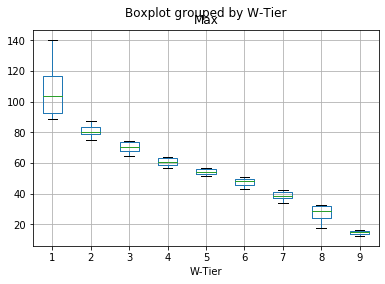

In [65]:
w.loc[w['Team'] == 'LAK']
w.boxplot(column = 'Max', by = 'W-Tier')


In [43]:
d.loc[d['Team'] == 'LAK']

,Player,Team,Position,Salary,Defense,Enforcer,PK,Max,Reccomendation,D-Rank,D-Tier
2,Victor Hedman,LAK,D,"7,875,000",76.6,38.7,69.3,76.6,Defense,3,1
4,Alex Pietrangelo,LAK,D,"8,800,000",72.0,32.1,61.3,72.0,Defense,5,1
11,Neal Pionk,LAK,D,"3,000,000",66.2,44.3,64.3,66.2,Defense,12,1
20,Mikhail Sergachev,LAK,D,"4,800,000",55.9,35.9,61.4,61.4,PK,21,2
52,Jakob Chychrun,LAK,D,"4,600,000",45.8,26.7,51.3,51.3,PK,53,4
84,Adam Pelech,LAK,D,"1,600,000",23.6,20.1,38.3,38.3,PK,85,6
87,Troy Stecher,LAK,D,"1,700,000",31.3,21.0,36.5,36.5,PK,88,6
117,Dennis Cholowski,LAK,D,"894,166",12.7,5.6,13.7,13.7,PK,118,8


In [ ]:
eval['Team'].unique()

In [ ]:
# Use to review a specific player

Player = 'Anze Kopitar'

eval.loc[(data['Player'] == Player),]

In [ ]:
team = 'PITT'
eval.loc[(eval['Team'] == team)]

    

In [ ]:
eval['Rank'].mean()